In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os

In [2]:
def display(img):
    if len(img.shape) == 3:
        img = img[:, :, ::-1]
    plt.imshow(img)
    return

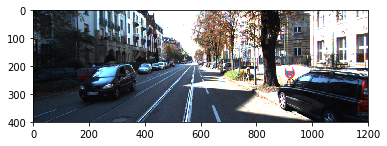

In [3]:
tempImg = cv.imread("/home/indranil/graphCut/data/training/kitti_train_img/000000_10.png", 1)
display(tempImg)

(400, 1200)


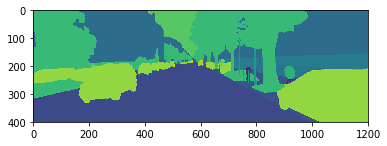

In [4]:
templabelImg = cv.imread("/home/indranil/graphCut/data/training/semantic/000000_10.png", 0)
print(templabelImg.shape)
display(templabelImg)

In [5]:
def lane(img):
    laneImg = np.zeros((img.shape[0], img.shape[1]), dtype = np.uint8)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if img[i, j] == 7:
                laneImg[i, j] = 255
    return laneImg

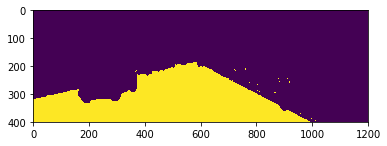

In [6]:
lane = lane(templabelImg)
display(lane)

In [7]:
def boundary(laneImg):
    boundaryImg = cv.Canny(laneImg, 40, 90)
    kernel = np.ones((20,20), np.uint8)
    dilatedImg = cv.dilate(boundaryImg, kernel, iterations=1)
    return dilatedImg

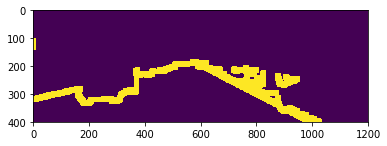

In [8]:
boundaryImg = boundary(lane)
display(boundaryImg)

In [9]:
def getSegment(lane, boundary):
    segments = np.zeros((lane.shape[0], lane.shape[1]), dtype = np.uint8)
    for i in range(lane.shape[0]):
        for j in range(lane.shape[1]):
            if boundary[i, j] == 255:
                segments[i, j] = 127
            elif lane[i, j] == 255:
                segments[i, j] = 255
    return segments

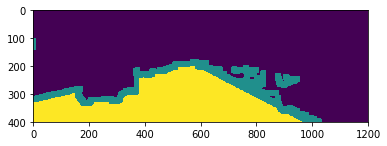

In [10]:
segments = getSegment(lane, boundaryImg)
display(segments)

### Sample_pixels = All_boundary_pixels + lane_pixels(with prob 0.3)

In [15]:
def addPixels(segments, labelImg):
    pixelImg = np.zeros((segments.shape[0], segments.shape[1]), dtype = np.uint8)
    for i in range(1, segments.shape[0]-1):
        for j in range(1, segments.shape[1]-1):
            if segments[i, j] == 127:
                if labelImg[i, j] == 7:
                    pixelImg[i, j] = 255
                else:
                    pixelImg[i, j] = 127
            else:
                randomNum = np.random.rand()
                if segments[i, j] == 255 and randomNum < 0.3:
                    pixelImg[i, j] = 255
#                 elif segments[i, j] != 255 and randomNum < 0.15:
#                     pixelImg[i, j] = 255
    return pixelImg

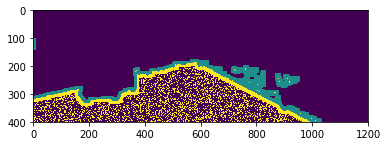

In [16]:
pixels = addPixels(segments, templabelImg)
display(pixels)